In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [4]:
import warnings

warnings.filterwarnings('ignore')

In [5]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)


In [7]:
# See the first 5 rows
iris_df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# check number of rows and columns of train data
iris_df.shape

(150, 4)

In [10]:
# to get infomation about the  train data
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


# preprocessing

In [11]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [12]:
## Check for Duplicates and Remove 
iris_df.duplicated().sum() 
iris_df.drop_duplicates(inplace = True)  

In [17]:
X= iris_df.iloc[:, [1,2,3]].values

In [18]:
from sklearn.cluster import KMeans
km=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters
k_values=range(1,11)
for i in k_values:
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    k_fit=kmeans.fit(X)
    km.append(kmeans.inertia_)

In [19]:
# Centers of Clusters for each feature
k_fit.cluster_centers_

array([[3.02272727, 4.65      , 1.5       ],
       [3.43809524, 1.48095238, 0.26190476],
       [2.72631579, 4.09473684, 1.26842105],
       [3.1       , 6.52857143, 2.04285714],
       [3.025     , 1.3875    , 0.19375   ],
       [3.23076923, 5.80769231, 2.28461538],
       [2.35      , 3.5125    , 1.025     ],
       [2.95294118, 5.39411765, 2.01764706],
       [2.57692308, 4.95384615, 1.7       ],
       [3.90769231, 1.52307692, 0.28461538]])

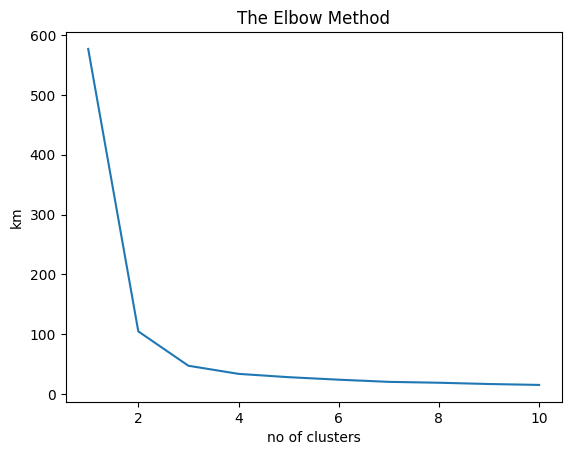

In [20]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), km)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('km')
plt.show()

In [23]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 1 2 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 1 2 2
 2]


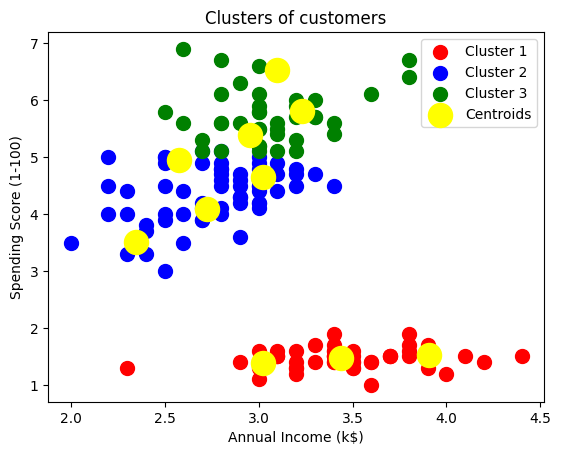

In [24]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [27]:
# Evaluate using Silhouette Coefficient
from sklearn import metrics
silhouette_avg = metrics.silhouette_score(X, y_kmeans)
print("Silhouette Coefficient:", silhouette_avg)


Silhouette Coefficient: 0.6033444914795995


In [26]:
from sklearn.metrics import pairwise_distances
# Calculate pairwise distances between data points and cluster centers
distances = pairwise_distances(X, kmeans.cluster_centers_)

# Calculate cluster cohesion as the average distance within each cluster
cohesion = np.mean(np.min(distances, axis=1))
print("Cluster Cohesion:", cohesion)

Cluster Cohesion: 0.28669672126892853


In [28]:
# Calculate entropy
entropy = metrics.cluster.entropy(y_kmeans)
print("Entropy:", entropy)
print("purity=" , 100-entropy)

Entropy: 1.0835387341079457
purity= 98.91646126589205
